# Assignment 3

In [1]:
import gpxpy
import gpxpy.gpx
import numpy as np
import matplotlib.pyplot as plt


def drawCurve(tstart, tend, ai, bi):
    tt = range(tstart, tend)
    x = np.zeros(len(tt))
    y = np.zeros(len(tt))
    i = 0
    for t in range(tstart, tend):
        x[i] = ai[0]*t*t + ai[1]*t + ai[2]
        y[i] = bi[0]*t*t + bi[1]*t + bi[2]
        i = i + 1
    return x, y

## Q1

Text(0.5, 1.0, 'Trajectory')

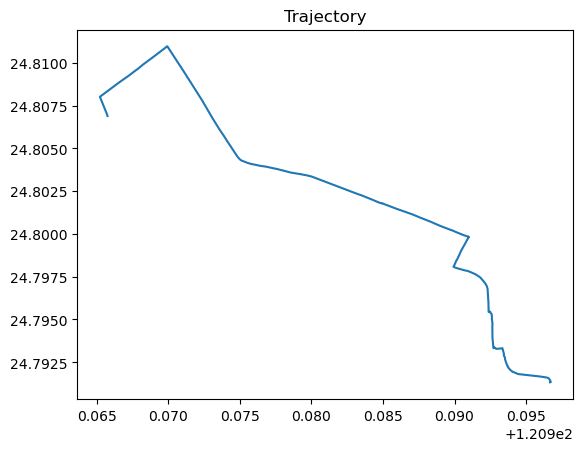

In [2]:
gpx_file = open('A3_110062219.gpx', 'r', encoding="utf-8")
gpx = gpxpy.parse(gpx_file)

x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

plt.plot(x, y)
plt.title("Trajectory") # title

Text(0.5, 1.0, 'Trajectory')

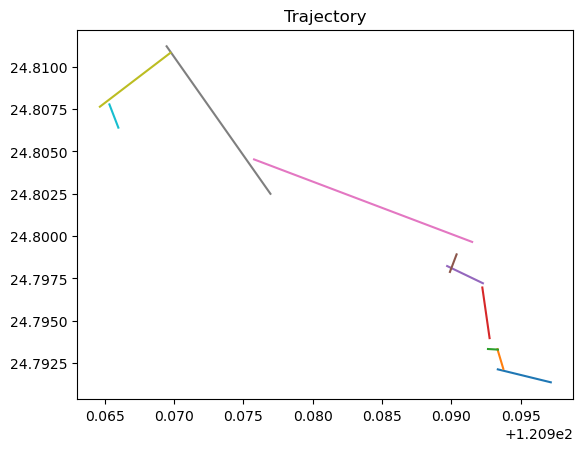

In [3]:
# We will break the trajectory into segments by hand here
seg_idx = [1, 33, 44, 56, 93, 108, 117, 165, 198, 209, 213]
            
# We need to solve a least square problem.
#  Aw = X and Az = Y
xp = []
yp = []
# Since t is 1, 2, ...., so we can use it as indices.
idx_prev = seg_idx[0]
for idx in seg_idx[1:]:
    n = idx - idx_prev + 1
    A = np.ones((n, 2))
    A[:, 1] = np.array(range(idx_prev-1, idx))
    w = np.linalg.lstsq(A, x[idx_prev-1:idx], rcond=None)[0]
    z = np.linalg.lstsq(A, y[idx_prev-1:idx], rcond=None)[0]
    xp.append(w[0]+w[1]*(idx_prev-1))
    xp.append(w[0]+w[1]*idx)
    yp.append(z[0]+z[1]*(idx_prev-1))
    yp.append(z[0]+z[1]*idx)
    idx_prev = idx

n = len(xp)
for i in range(0, n, 2):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory") # title

## Q2
### a)

In [4]:
A = np.random.rand(1024, 1000)
b = np.random.rand(1024)

x, residuals, *_ = np.linalg.lstsq(A, b, rcond=None)

err = np.linalg.norm(A @ x - b)**2

print(residuals[0], err)
assert np.isclose(residuals[0], err)

2.364777020543192 2.3647770205431775


### b)

91.4 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.1 ms ± 982 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.9 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.2 ms ± 931 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.2 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.1 ms ± 925 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.3 ms ± 972 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.2 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.2 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.1 ms ± 784 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.6 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.4 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.1 ms ± 972 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.1 ms ± 984 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
91.1 ms ± 974

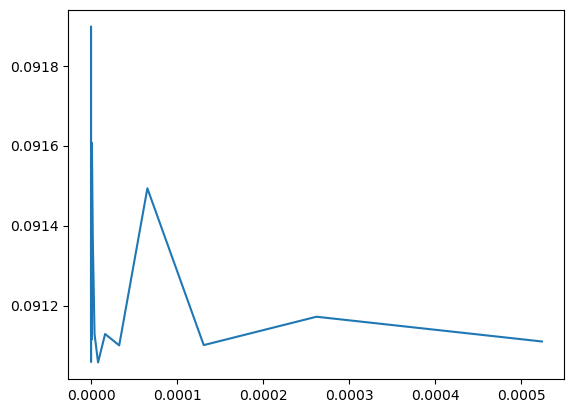

In [5]:
A = np.random.rand(1000, 1024)
b = np.random.rand(1000)

lst = []

for i in range(20):
    t = %timeit -o np.linalg.lstsq(A, b, rcond=1e-8*2**i)
    lst.append(t.average)

plt.plot([1e-9*2**i for i in range(20)], lst)

## Q3

In [6]:
from typing import *


def f(n: int, x: List[int], y: List[int], eps: float) -> Tuple[List[int], List[int]]:
    xp = []
    yp = []
    i = 0
    
    def g(j: int):
        n = j - i + 1
        assert n > 1
        A = np.ones((n, 2))
        A[:, 1] = np.array(range(i, j + 1))
        w, residuals_w, *_ = np.linalg.lstsq(A, x[i:j+1], rcond=None)
        z, residuals_z, *_  = np.linalg.lstsq(A, y[i:j+1], rcond=None)
        return w, z, residuals_w[0] + residuals_z[0] if n > 2 else 0
    
    for j in range(2, n):
        w, z, err = g(j)
        if err > eps:
            w, z, err = g(j - 1)
            assert err <= eps
            xp.append(w[0] + w[1] * i)
            xp.append(w[0] + w[1] * (j - 1))
            yp.append(z[0] + z[1] * i)
            yp.append(z[0] + z[1] * (j - 1))
            print(i, j - 1)
            i = j
    
    if i != n - 1:
        w, z, err = g(n - 1)
        assert err <= eps
        xp.append(w[0] + w[1] * i)
        xp.append(w[0] + w[1] * (n - 1))
        yp.append(z[0] + z[1] * i)
        yp.append(z[0] + z[1] * (n - 1))
        print(i, n - 1)
        i = n
    
    return xp, yp

0 33
34 67
68 100
101 119
120 137
138 153
154 178
179 196
197 210
211 212


Text(0.5, 1.0, 'Trajectory')

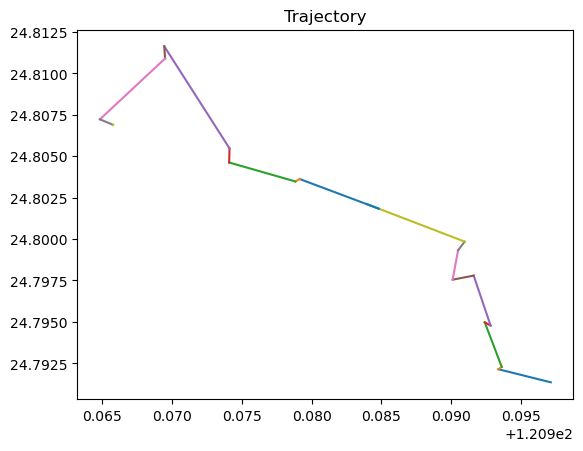

In [7]:
with open('A3_110062219.gpx', 'r', encoding="utf-8") as gpx_file:
    gpx = gpxpy.parse(gpx_file)

n = 0
x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        n += len(segment.points)
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

xp, yp = f(n, x, y, 3.375e-6)
for i in range(n):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory")

0 46
47 94
95 191
192 251


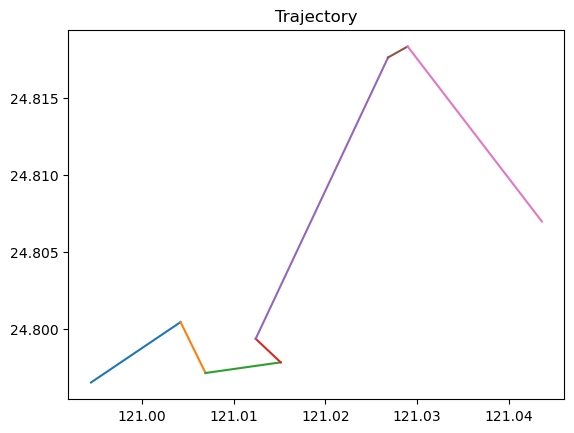

0 24
25 43
44 81
82 126
127 178
179 195
196 228
229 252


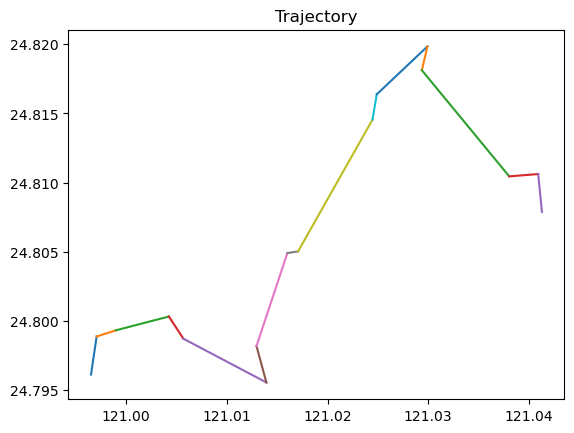

0 10
11 24
25 33
34 42
43 59
60 76
77 86
87 94
95 113
114 129
130 150
151 173
174 186
187 193
194 202
203 213
214 228
229 237
238 249
250 252


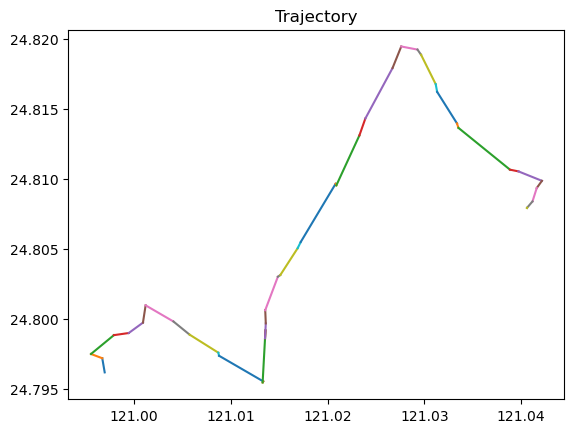

0 8
9 13
14 18
19 24
25 27
28 32
33 35
36 42
43 46
47 52
53 61
62 68
69 76
77 82
83 93
94 105
106 111
112 117
118 122
123 126
127 134
135 146
147 153
154 166
167 173
174 175
176 179
180 184
185 186
187 191
192 201
202 208
209 211
212 215
216 219
220 224
225 229
230 232
233 239
240 249
250 252


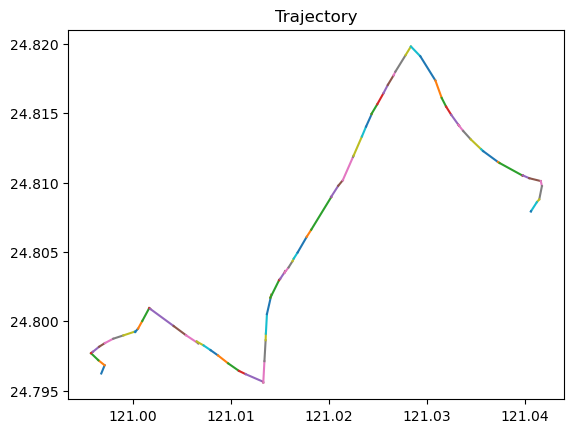

In [8]:
with open('route.gpx', 'r', encoding="utf-8") as gpx_file:
    gpx = gpxpy.parse(gpx_file)

n = 0
x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        n += len(segment.points)
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)
for j in range(4, 8):
    xp, yp = f(n, x, y, 10 ** -j)
    for i in range(n):
        plt.plot(xp[i:i+2], yp[i:i+2])
    plt.title("Trajectory")
    plt.show()

## Q4

In [9]:
def fp(n: int, x: List[int], y: List[int], eps: float) -> Tuple[List[int], List[int]]:
    lst = []
    i = 0
    
    def g(j: int):
        n = j - i + 1
        assert n > 1
        A = np.ones((n, 3))
        A[:, 1] = np.array(range(i, j + 1))
        A[:, 2] = np.array([k ** 2 for k in range(i, j + 1)])
        w, residuals_w, *_ = np.linalg.lstsq(A, x[i:j+1], rcond=None)
        z, residuals_z, *_  = np.linalg.lstsq(A, y[i:j+1], rcond=None)
        return w, z, residuals_w[0] + residuals_z[0] if n > 3 else 0
    
    for j in range(2, n):
        w, z, err = g(j)
        if err > eps:
            w, z, err = g(j - 1)
            assert err <= eps
            lst.append((i, j - 1, w, z))
            print(i, j - 1)
            i = j
    
    if i != n - 1:
        w, z, err = g(n - 1)
        assert err <= eps
        lst.append((i, n - 1, w, z))
        print(i, n - 1)
        i = n
    
    return lst

0 83
84 124
125 173
174 200
201 212


Text(0.5, 1.0, 'Trajectory')

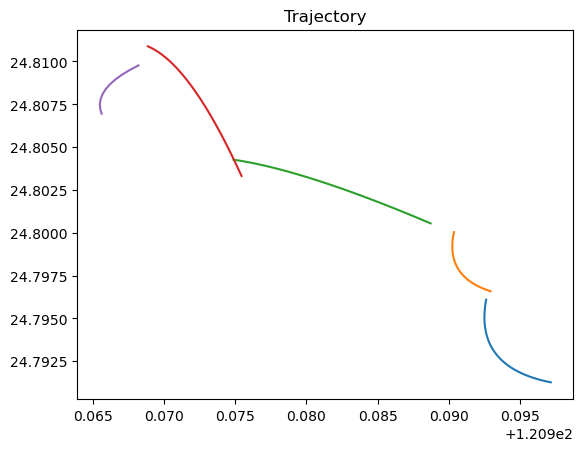

In [10]:
with open('A3_110062219.gpx', 'r', encoding="utf-8") as gpx_file:
    gpx = gpxpy.parse(gpx_file)

n = 0
x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        n += len(segment.points)
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

for i, j, w, z in fp(n, x, y, 1e-5):
    plt.plot(*drawCurve(i, j, w[::-1], z[::-1]))
plt.title("Trajectory")

0 78
79 201
202 252


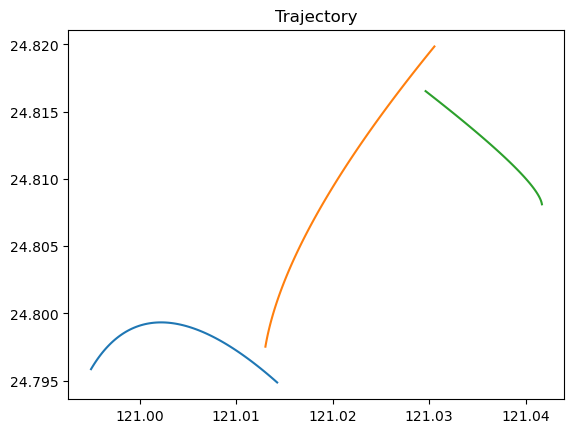

0 35
36 70
71 106
107 174
175 205
206 240
241 252


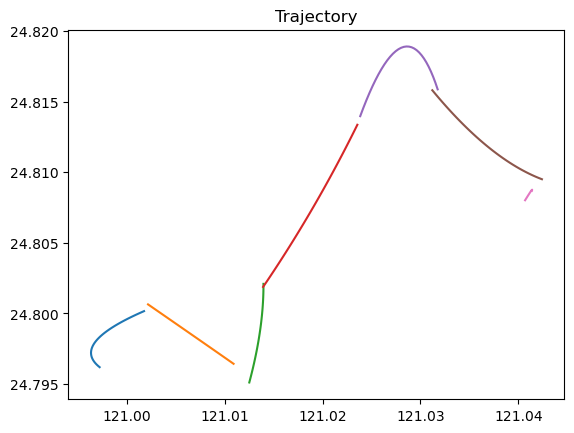

0 15
16 28
29 39
40 50
51 61
62 79
80 92
93 109
110 144
145 173
174 186
187 199
200 208
209 225
226 239
240 252


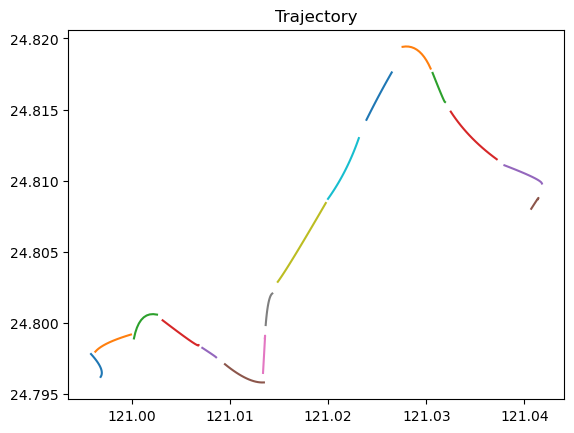

0 8
9 19
20 24
25 31
32 36
37 42
43 49
50 59
60 62
63 70
71 77
78 82
83 93
94 108
109 120
121 126
127 138
139 151
152 161
162 173
174 177
178 184
185 187
188 191
192 201
202 208
209 214
215 220
221 225
226 231
232 236
237 240
241 249
250 252


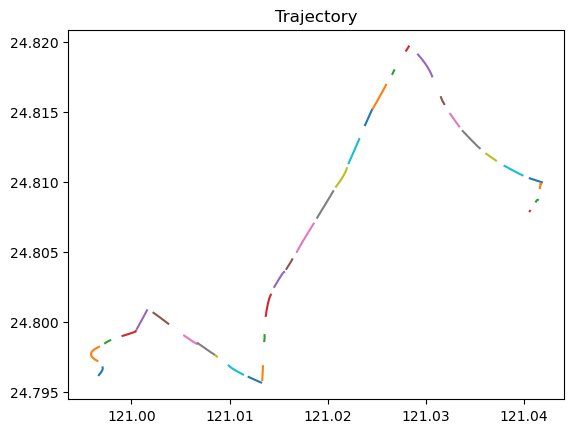

In [11]:
with open('route.gpx', 'r', encoding="utf-8") as gpx_file:
    gpx = gpxpy.parse(gpx_file)

n = 0
x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        n += len(segment.points)
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)
for j in range(4, 8):
    for i, j, w, z in fp(n, x, y, 10 ** -j):
        plt.plot(*drawCurve(i, j, w[::-1], z[::-1]))
    plt.title("Trajectory")
    plt.show()

## Q5

In [12]:
from scipy.odr import *


def fpp(n: int, x: List[int], y: List[int], eps: float) -> Tuple[List[int], List[int]]:
    xp = []
    yp = []
    i = 0
    
    def g(j: int):
        n = j - i + 1
        assert n > 1
        odr_x = ODR(RealData(range(i, j + 1), x[i:j+1]), unilinear).run()
        odr_y = ODR(RealData(range(i, j + 1), y[i:j+1]), unilinear).run()
        return odr_x.beta, odr_y.beta, odr_x.sum_square + odr_y.sum_square
    
    for j in range(2, n):
        w, z, err = g(j)
        if err > eps:
            w, z, err = g(j - 1)
            assert err <= eps
            xp.append(w[0] * i + w[1])
            xp.append(w[0] * (j - 1) + w[1])
            yp.append(z[0] * i + z[1])
            yp.append(z[0] * (j - 1) + z[1])
            print(i, j - 1)
            i = j
    
    if i != n - 1:
        w, z, err = g(n - 1)
        assert err <= eps
        xp.append(w[0] * i + w[1])
        xp.append(w[0] * (n - 1) + w[1])
        yp.append(z[0] * i + z[1])
        yp.append(z[0] * (n - 1) + z[1])
        print(i, n - 1)
        i = n
    
    return xp, yp


0 33
34 67
68 100
101 119
120 137
138 153
154 178
179 196
197 210
211 212


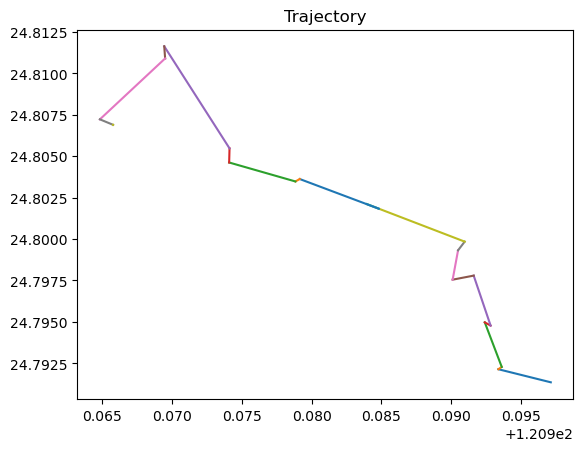

0 53
54 102
103 126
127 168
169 191
192 212


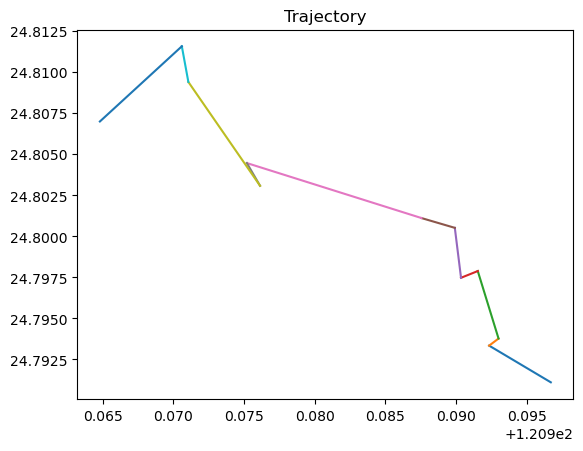

In [13]:
with open('A3_110062219.gpx', 'r', encoding="utf-8") as gpx_file:
    gpx = gpxpy.parse(gpx_file)

n = 0
x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        n += len(segment.points)
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)

xp, yp = fpp(n, x, y, 3.375e-6)
for i in range(n):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory")
plt.show()

xp, yp = fpp(n, x, y, 1e-5)
for i in range(n):
    plt.plot(xp[i:i+2], yp[i:i+2])
plt.title("Trajectory")
plt.show()

0 46
47 94
95 191
192 251


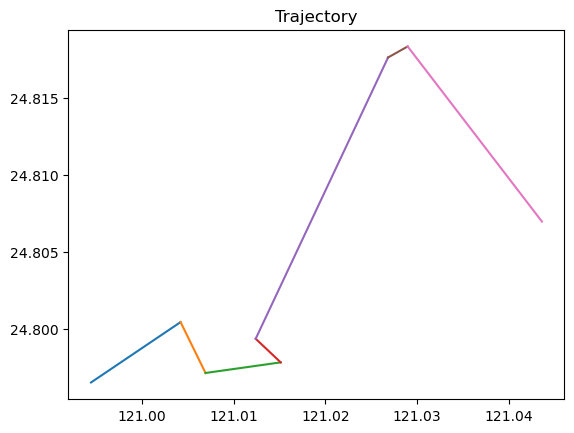

0 24
25 43
44 81
82 126
127 178
179 195
196 228
229 252


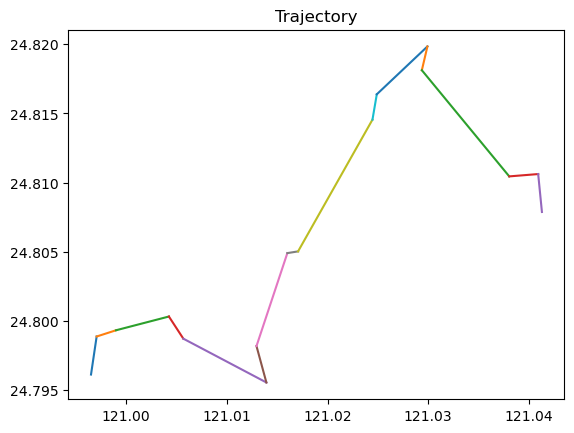

0 10
11 24
25 33
34 42
43 59
60 76
77 86
87 94
95 113
114 129
130 150
151 173
174 186
187 193
194 202
203 213
214 228
229 237
238 249
250 252


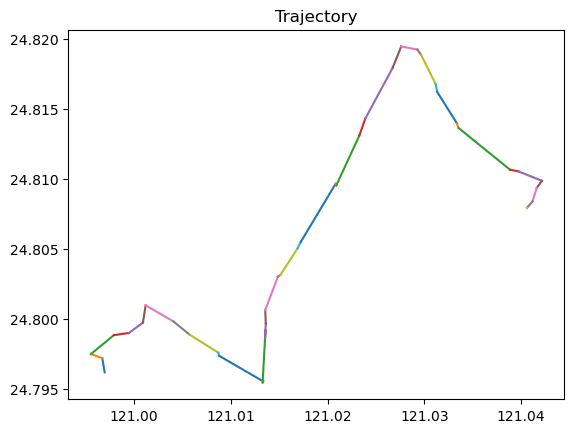

0 8
9 13
14 18
19 24
25 27
28 32
33 35
36 42
43 46
47 52
53 61
62 68
69 76
77 82
83 93
94 105
106 111
112 117
118 122
123 126
127 134
135 146
147 153
154 166
167 173
174 175
176 179
180 184
185 186
187 191
192 201
202 208
209 211
212 215
216 219
220 224
225 229
230 232
233 239
240 249
250 252


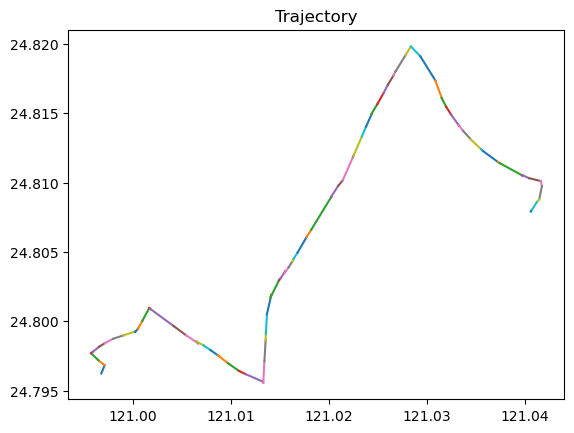

In [14]:
with open('route.gpx', 'r', encoding="utf-8") as gpx_file:
    gpx = gpxpy.parse(gpx_file)

n = 0
x = []
y = []
for track in gpx.tracks:
    for segment in track.segments:
        n += len(segment.points)
        for point in segment.points:
            x.append(point.longitude)
            y.append(point.latitude)
for j in range(4, 8):
    xp, yp = fpp(n, x, y, 10 ** -j)
    for i in range(n):
        plt.plot(xp[i:i+2], yp[i:i+2])
    plt.title("Trajectory")
    plt.show()